In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.multivariate_normal?

In [3]:
mean_1 = np.array([7, 8])
mean_2 = np.array([2, -5])

In [4]:
cov_1 = np.array([[1, 5], [5, 1]])
cov_2 = np.array([[1, 3], [3, 1]])

In [5]:
dist_1 = np.random.multivariate_normal(mean_1, cov_1, size = 500)
dist_2 = np.random.multivariate_normal(mean_2, cov_2, size = 500)

C:\Users\bhatt\AppData\Local\Temp\ipykernel_35312\1626948445.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_1 = np.random.multivariate_normal(mean_1, cov_1, size = 500)
C:\Users\bhatt\AppData\Local\Temp\ipykernel_35312\1626948445.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_2 = np.random.multivariate_normal(mean_2, cov_2, size = 500)


In [6]:
dist_1.shape, dist_2.shape

((500, 2), (500, 2))

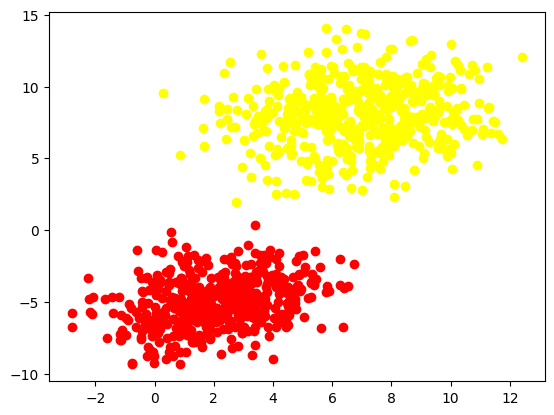

In [7]:
plt.scatter(dist_1[:, 0], dist_1[:, 1], c = 'yellow')
plt.scatter(dist_2[:, 0], dist_2[:, 1], c = 'red')

In [8]:
dataset = np.zeros((1000, 3))
dataset[:500, :2] = dist_1
dataset[500:, :2] = dist_2

dataset[500:, -1] = 1

In [9]:
print(dataset[0])
print(dataset[-1])

[2.21137635 7.44972344 0.        ]
[ 1.81675703 -5.05019621  1.        ]


In [10]:
np.random.shuffle(dataset)

In [11]:
print(dataset[:10, ])

[[ 1.86960512 -7.61015578  1.        ]
 [ 4.51221304 -5.29436851  1.        ]
 [-0.26545902 -6.44675197  1.        ]
 [ 7.51663744  9.82211192  0.        ]
 [ 4.53018386 -5.95271837  1.        ]
 [ 5.14574123  4.78133898  0.        ]
 [ 5.85788198 10.5462273   0.        ]
 [ 6.35529037  8.06660477  0.        ]
 [ 1.0012128  -2.51591792  1.        ]
 [ 3.29939995 -8.70376998  1.        ]]


In [12]:
X_train = dataset[:800, :-1]
X_test = dataset[800:, :-1]

Y_train = dataset[:800, -1]
Y_test = dataset[800:, -1]

In [13]:
print(X_test.shape, X_train.shape, Y_test.shape, Y_train.shape)

(200, 2) (800, 2) (200,) (800,)


In [14]:
u = X_train.mean(axis = 0)
std = X_train.std(axis = 0)

In [15]:
X_train = (X_train - u)/std

In [16]:
u = X_test.mean(axis = 0)
std = X_test.std(axis = 0)

In [17]:
X_test = (X_test - u)/std

In [18]:
def hypothesis(X, theta):
    return 1 / (1 + np.exp(-1 * np.dot(X, theta)))

In [19]:
np.dot?

In [20]:
def loss_func(X, Y, weights):
    
    h_x = hypothesis(X, weights)
    loss = np.mean(Y*np.log(h_x) + (1 - Y)*np.log((1 - h_x)))
    
    return -1*loss

In [21]:
def gradient(x, y, weight):
    
    y_pred = hypothesis(x, weight)
    grad = np.dot(x.T, (y - y_pred))
        
    return grad/x.shape[0]

In [22]:
def gradient_descent(x, y, learning_rate = 0.03):
    
    weight = np.zeros((x.shape[1], ))
    
    cost = []
    
    epoch = 10000
    
    for i in range(epoch):
        grad = gradient(x, y, weight)
        
        loss = loss_func(x, y, weight)
        cost.append(loss)

        weight = weight + learning_rate * grad
        
    return cost, weight

In [23]:
ones = np.ones((X_train.shape[0], 1))
X_train = np.hstack((ones, X_train))

In [24]:
print(X_train[0])

[ 1.         -0.83247693 -1.33967186]


In [25]:
cost, theta = gradient_descent(X_train, Y_train)

In [26]:
cost

[0.6931471805599452,
 0.681857805243433,
 0.670865141744211,
 0.6601611684915967,
 0.6497379671631314,
 0.6395877342510287,
 0.6297027912729871,
 0.6200755936860692,
 0.6106987385680347,
 0.6015649711347076,
 0.5926671901647862,
 0.5839984524051187,
 0.5755519760300165,
 0.5673211432277953,
 0.5592995019865709,
 0.551480767149519,
 0.5438588208074576,
 0.5364277120938411,
 0.5291816564441671,
 0.5221150343784854,
 0.5152223898622246,
 0.5084984282970167,
 0.5019380141896216,
 0.4955361685435156,
 0.4892880660142302,
 0.48318903186614565,
 0.4772345387651912,
 0.4714202034387897,
 0.4657417832314251,
 0.46019517258142434,
 0.4547763994419196,
 0.44948162166651207,
 0.44430712337788025,
 0.4392493113354706,
 0.4343047113164646,
 0.42946996452243263,
 0.42474182402245575,
 0.42011715124200516,
 0.41559291250552116,
 0.411166175639409,
 0.4068341066410649,
 0.4025939664185539,
 0.39844310760467216,
 0.3943789714483304,
 0.3903990847854925,
 0.38650105709127247,
 0.3826825776142438,
 0.3789

In [27]:
cost[-1]

0.010186746141831965

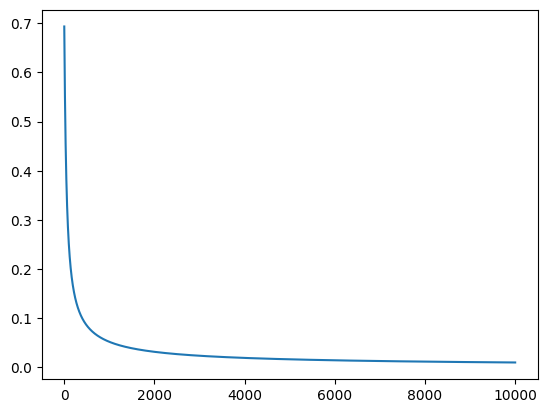

In [28]:
plt.plot(cost)

In [29]:
theta

array([-0.40394948, -1.79146417, -5.57027362])

In [45]:
x = np.arange(-2, 13)
y = -(theta[1]*x + theta[0])/theta[2]

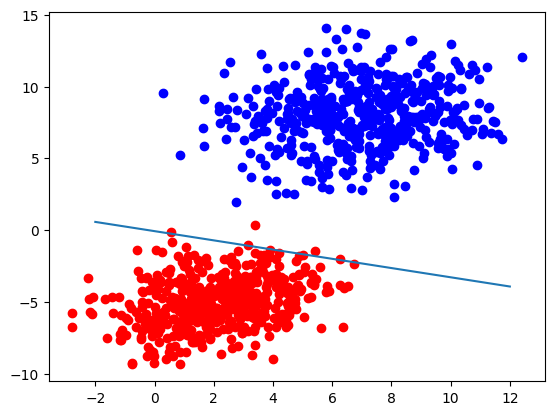

In [46]:
plt.scatter(dist_1[:, 0], dist_1[:, 1], c = 'blue')
plt.scatter(dist_2[:, 0], dist_2[:, 1], c = 'red')
plt.plot(x, y)

In [47]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

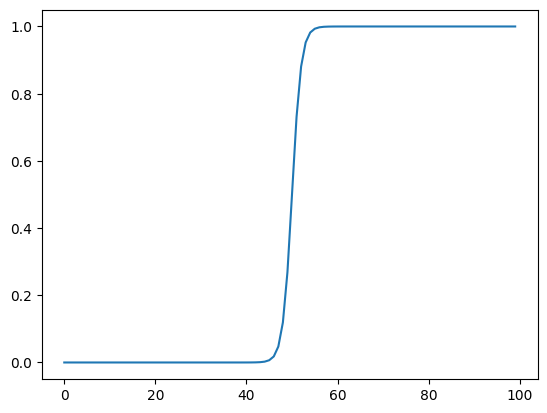

In [50]:
plt.plot(sigmoid(np.arange(-50, 50)))

In [52]:
ones = np.ones((X_test.shape[0], 1))
X_test = np.hstack((ones, X_test))

In [70]:
def predict(X, theta):
    h_x = hypothesis(X, theta)
    
    if (h_x >= 0.5):
        return 1
    else:
        return 0

In [71]:
y_pred_train = predict(X_train[200], theta)

In [72]:
y_pred_train, Y_train[0]

(1, 1.0)

In [73]:
corr = 0
for i in range(X_test.shape[0]):
    pred = predict(X_test[i], theta)
    if pred == Y_test[i]:
        corr+=1
print(corr/X_test.shape[0])

1.0


In [74]:
corr = 0
for i in range(X_train.shape[0]):
    pred = predict(X_train[i], theta)
    if pred == Y_train[i]:
        corr+=1
print(corr/X_train.shape[0])

0.99875
